# GGplot Tutorial

The API ggplot, created by Hadley Wikham, is a plotting system for Python based on R's ggplot2. It helps users make proessional looking visualizations with minimal effort. The 'gg' stands for grammer of graphics. Making plots can be very repetitive with many of the same functions being reused over and over; like draw a line of best fit, label axes etc. With ggplot, users avoid having to copy paste lots of code and can instead use the many basic provided commands. A tradeoff of this is that ggplot is not the best for making highly customized data visualizations, but you can still make sophisticated looking plots and all the commands are very intuitive. 

We can start by installing ggplot with the following line and then just importing it.

    !pip install plotnine

In [69]:
from plotnine.data import * 
from plotnine import *

We will cover the following topics in this tutorial:
- [Exploring the Data](#Exploring-the-Data)
- [Aesthetics and Layers](#Aesthetics-and-Layers)
- [Adding Labels and Themes](#Adding-Labels-and-Themes)
- [Using Geoms (with One Variable) and Scale](#Using-Geoms-with-One-Variable-and-Scale)
- [Geoms and Scale Continued With More than One Variable](#Geoms-and-Scale-Continued-With-More-than-One-Variable)
- [Facets](#Facets)
- [Time Series](#Time-Series)
- [Smoothing](#Smoothing)
- [Other Python Implementations of R's ggplot](#Other-Python-Implementations-of-R's-ggplot)
- [References](#References)

## Exploring the Data
For this tuorial we can use the diamonds and occisionaly mtcars dataset which comes with the imported library. We can get more details about the diamonds dataset features here: http://ggplot2.tidyverse.org/reference/diamonds.html. Let's explore this data a little bit using Python commands.

In [2]:
type(diamonds)

pandas.core.frame.DataFrame

We can see the type of diamonds is a pandas Dataframe. It is convenient to use pandas dataframes when working with ggplot.

In [3]:
diamonds.shape 

(53940, 10)

This dataframe has 53940 rows and 10 columns. We can look more into what the type and values of those columns are with the command below.

In [4]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


This tells us information about the first 5 diamonds in the dataset. We see the data has 10 features, some categorical like color and others numerical like x,y and z.

The corr() function determines the correlation of all numberic fields in the dataset.

In [5]:
diamonds.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [6]:
diamonds.corr()>0.0

,carat,depth,table,price,x,y,z
carat,True,True,True,True,True,True,True
depth,True,True,False,False,False,False,True
table,True,False,True,True,True,True,True
price,True,False,True,True,True,True,True
x,True,False,True,True,True,True,True
y,True,False,True,True,True,True,True
z,True,True,True,True,True,True,True


To get more information about the values of a column we can use the .unique() command. 

In [7]:
diamonds['cut'].unique()

[Ideal, Premium, Good, Very Good, Fair]
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

So we can see the only values in the cut columns are 'Ideal', 'Premium', 'Good', 'Very Good', 'Fair'.

We should also check for any null values before plotting the data. We can do this as follows:

In [8]:
diamonds_noNull = diamonds.dropna(how = 'any')

In [9]:
len(diamonds_noNull) == len(diamonds)

True

Since the length of the dataset before and after dropping NA values did not change we conclude there aren't any NA values in the dataset.

Similarly for mtcars we see we have 12 features. Although it may not be clear just by looking at the head, by looking into unique values for some of the features we can see we have at least 4 categorical variabes: 'cyl', 'vs', 'am' and 'gear'. 

In [10]:
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [11]:
mtcars['cyl'].unique()

array([6, 4, 8])

In [12]:
mtcars['vs'].unique()

array([0, 1])

In [13]:
mtcars['am'].unique()

array([1, 0])

In [14]:
mtcars['gear'].unique()

array([4, 3, 5])

In [15]:
mtcars_noNull = mtcars.dropna(how = 'any')
len(mtcars_noNull) == len(mtcars)

True

## Aesthetics and Layers

Let's initialize a basic ggplot. First we need to tell ggplot what dataset to use. The specified dataset should have all the features you want to use in the plot. We then add aesthetics via the aes() argument. Aesthetics are how variables in the dataset are mappeed to visual objects. So this would include specifying x and y axis variables or color. Aesthetic arguments change based on type of graph. So, for example, a lineplot would have different aesthetic arguments then say a histogram.

Running the line of code as follows just creates a blank canvas. 

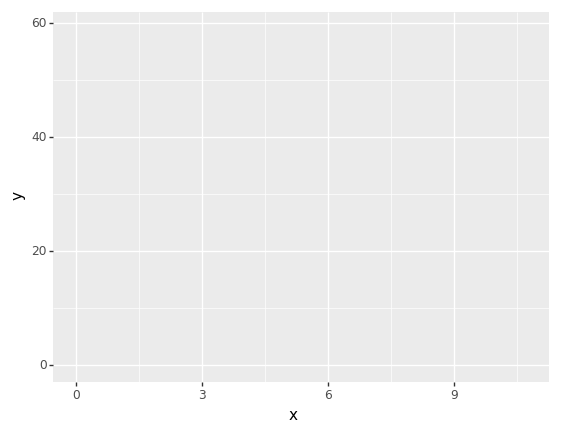

<ggplot: (278054397)>

In [16]:
p = ggplot(aes(x='x', y='y'), data=diamonds)
p

We can then add the points by adding the visualization componenet/layer "geom_point()". 

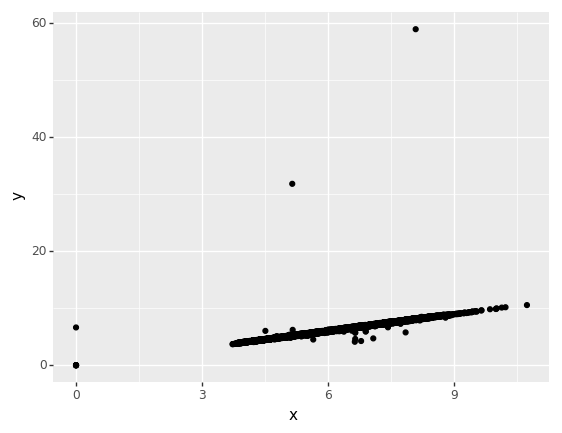

<ggplot: (278054229)>

In [17]:
p + geom_point()

Similarly we could add a line connecting the points with:

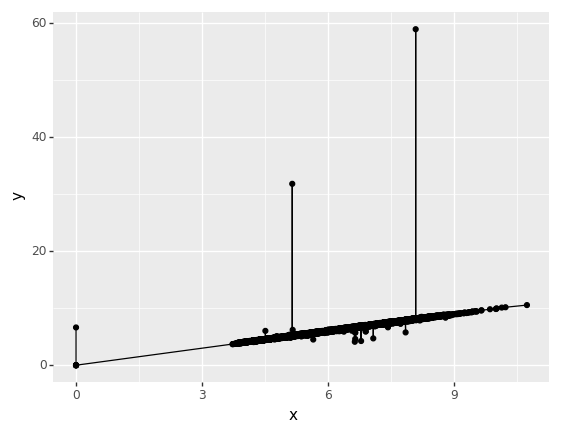

<ggplot: (278018824)>

In [18]:
p + geom_point() + geom_line()

We can use aesthetics to change size of the points as follows:

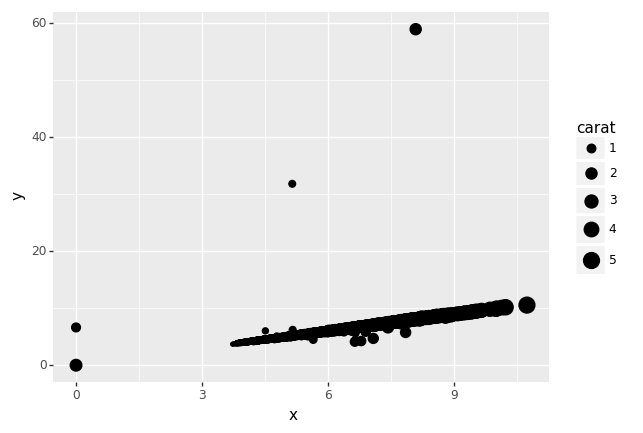

<ggplot: (-9223372036573672553)>

In [19]:
p = ggplot(aes(x='x', y='y', size = 'carat'), data=diamonds)
p + geom_point()

We can just add different things with the + sign to modify the existing ggplot object. We can change things about geom layers as well, using aesthetics when referencing the data. 

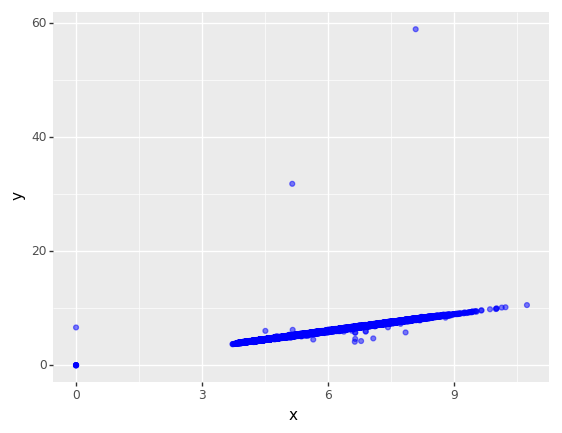

<ggplot: (-9223372036570244590)>

In [20]:
p = ggplot(aes(x='x', y='y'), data=diamonds)
p + geom_point(alpha = 0.5, color = "blue")

## Adding Labels and Themes

Now that we have a complete basic graph we can add titles and axis labels. We do this using "labs". 

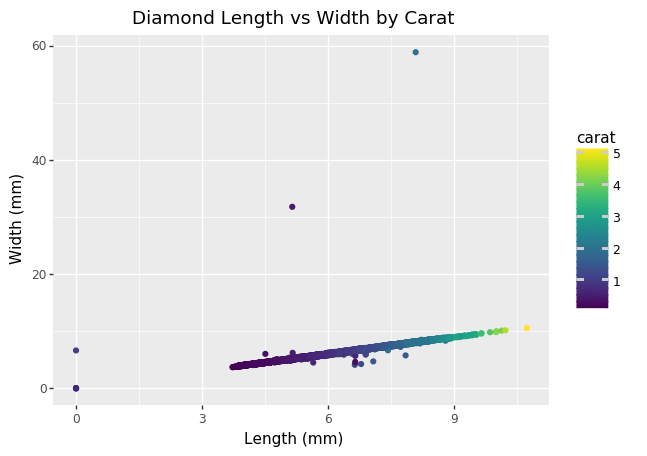

<ggplot: (-9223372036575697604)>

In [21]:
p = ggplot(aes(x='x', y='y', color = 'carat'), data=diamonds)
p = p + geom_point() + labs(title = "Diamond Length vs \
Width by Carat", x = 'Length (mm)', y = 'Width (mm)')
p

We can change the way these labels look using themes. Theme supports many customizations including title, plot_margin, axis_title, axis_title_x, axis_title_y, axis_text, axis_text_x, and axis_text_y. 

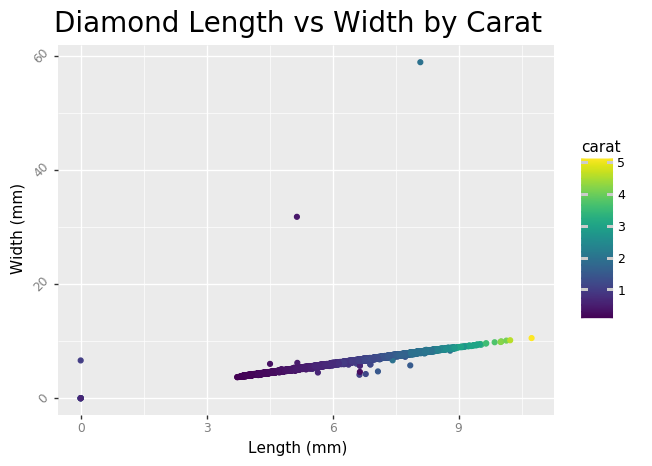

<ggplot: (-9223372036575697632)>

In [22]:
p + theme(axis_text=element_text(color='grey'), 
          axis_text_y=element_text(angle=45), 
          plot_title=element_text(size=20))

There are some built in themes as well. You can compare how these change the plots compared to the first default themed plot.

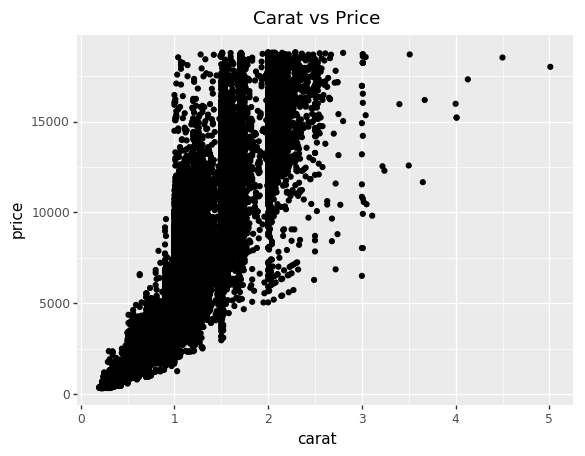

<ggplot: (292427980)>

In [23]:
theme_p = (ggplot(aes('carat', 'price'), data=diamonds) + 
            geom_point() + labs(title = "Carat vs Price"))
theme_p 

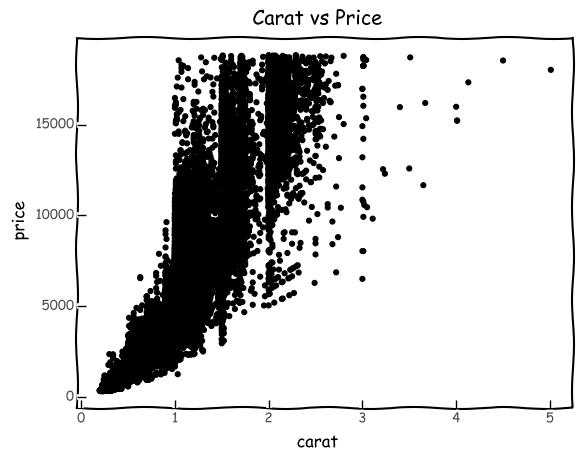

<ggplot: (-9223372036555655694)>

In [24]:
theme_p + theme_xkcd()

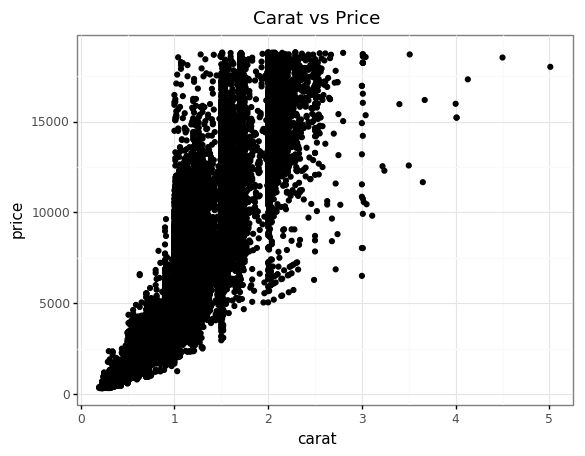

<ggplot: (297374079)>

In [25]:
theme_p + theme_bw()

The themes seen so far are called complete themes. You can also customize your own theme or add partial changes to add or override specific elements.
There are 3 main theming elements: text, rect and line.

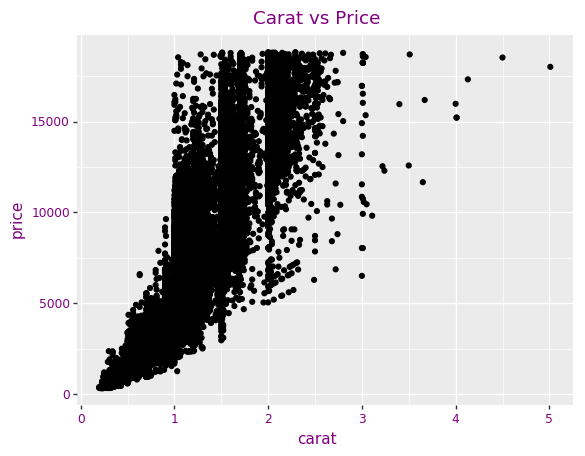

<ggplot: (-9223372036557401754)>

In [26]:
theme_p + theme(text=element_text(color="purple"))

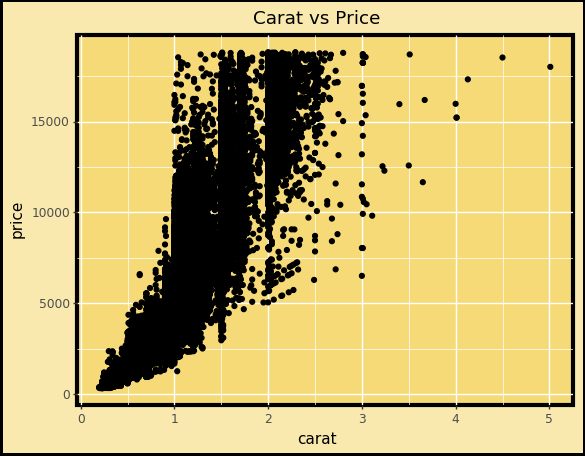

<ggplot: (-9223372036565855316)>

In [27]:
theme_p + theme(rect=element_rect(color="black", size=3, fill='#EEBA0050'))

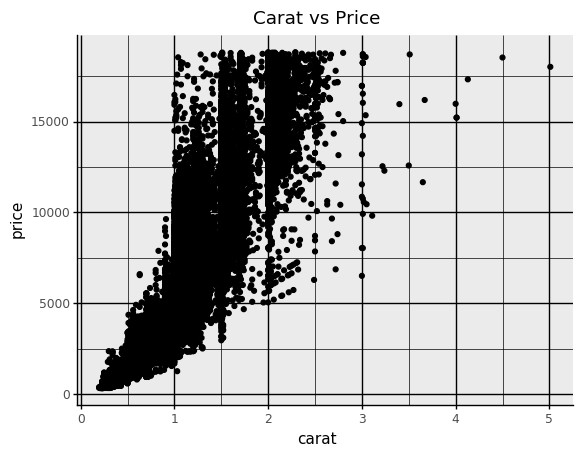

<ggplot: (300085561)>

In [28]:
theme_p + theme(line=element_line(color="black"))

There are so many other things you can do. Here are some of them but for a more complete list refer here: http://plotnine.readthedocs.io/en/stable/generated/plotnine.themes.theme.html#plotnine.themes.theme

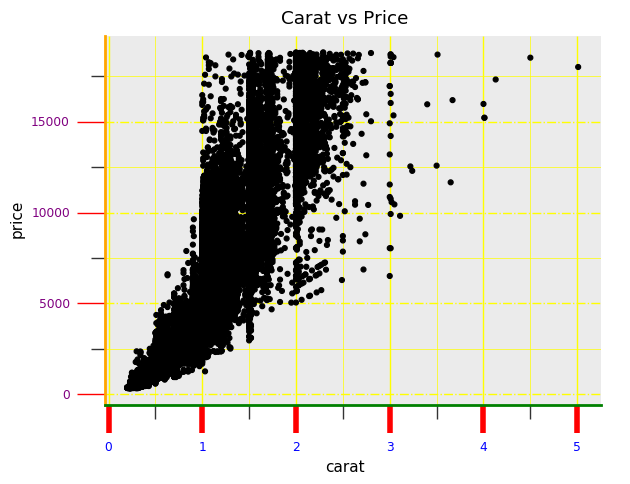

<ggplot: (297682096)>

In [29]:
theme_p + theme(
    axis_line=element_line(size=2),
    axis_line_x=element_line(color="green"),
    axis_line_y=element_line(color="orange"),
    axis_text=element_text(margin={'t': 5, 'r': 5}),
    axis_text_x=element_text(color="blue"),
    axis_text_y=element_text(color="purple"),
    axis_ticks_length=20,
    axis_ticks_major=element_line(color="red"),
    axis_ticks_length_minor=10,
    axis_ticks_major_x=element_line(size=4),
    panel_grid=element_line(color="yellow"),
    panel_grid_major_y=element_line(linetype='dashdot')
)

## Using Geoms with One Variable and Scale

There are many different geoms you can add to your plot. For example this is how you would make a histogram. We can change the binwidth parameter to adjust number and width of the bars.

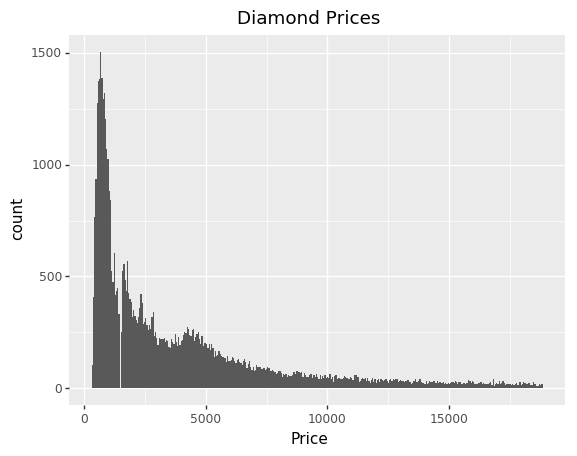

<ggplot: (305391112)>

In [30]:
p = ggplot(aes(x='price'), data=diamonds) + labs(x = 'Price', title = 'Diamond Prices')
p + geom_histogram(binwidth=50)

You can add scale_x_continuous with arguments:
1. name - for the x axis
2. breaks - to specify points at which x gridlines appear
3. labels - labels for x ticks
4. limits - where x axis starts/stops

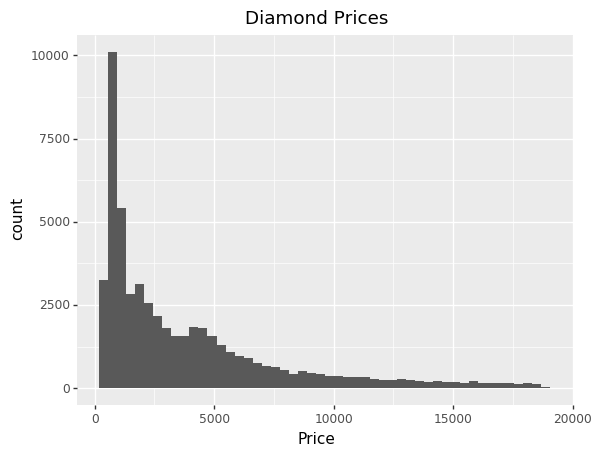

<ggplot: (-9223372036573596216)>

In [31]:
p + geom_histogram(bins = 50) + scale_x_continuous(name = "Price ($)",
                                          breaks=[0, 5000, 10000, 15000, 20000])

This is how we could make a boxplot. This is using a different dataset (mtcars). The choice of dataset is not important, you can make this kind of a plot when appropriate with any dataset.  

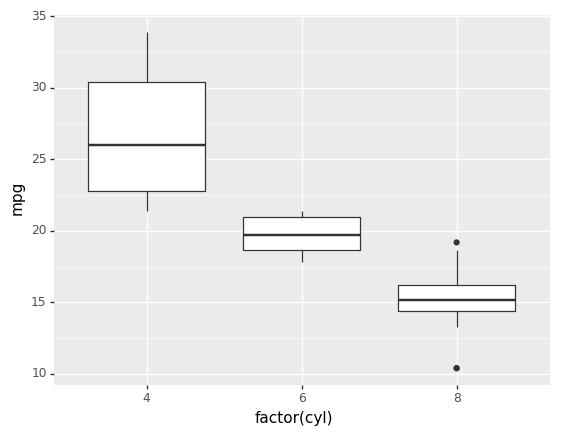

<ggplot: (281179014)>

In [32]:
ggplot(mtcars, aes(x='factor(cyl)', y='mpg')) + geom_boxplot()

Note: More about factor, which is used here on the x axis, is explained later (in the [Smoothing](#Smoothing) section).

Using geoms, we can make density plots. A density plot shows the distribution of a numeric variable with a continuous curve. It is similar to a histogram but without the need for binwidth.

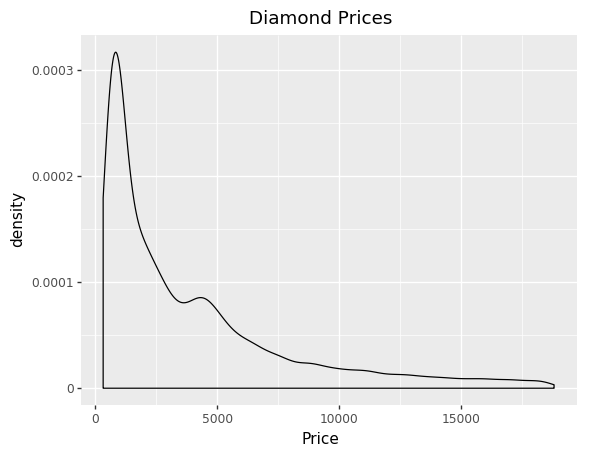

<ggplot: (-9223372036573425257)>

In [33]:
p = ggplot(aes(x='price'), data=diamonds) + labs(x = 'Price', title = 'Diamond Prices')
p + geom_density()

## Geoms and Scale Continued With More than One Variable

Continuing with density plots, here is a way to show information about both a continuous and categorical variable on the same plot. 

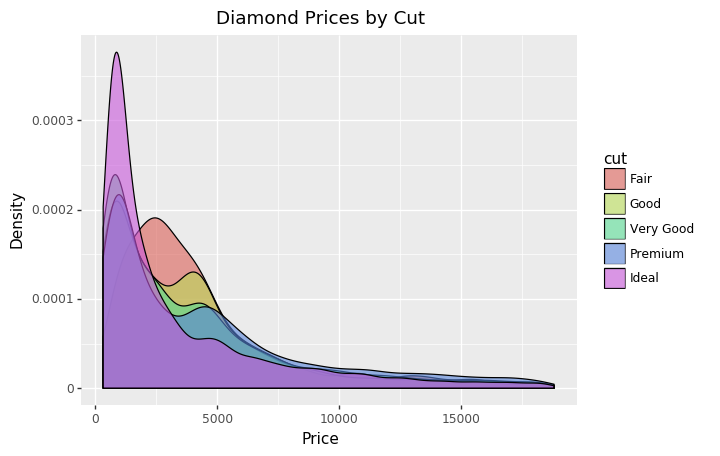

<ggplot: (281341665)>

In [34]:
p = (ggplot(aes(x='price', fill = 'cut'), data=diamonds) + 
     labs(x = 'Price', y = "Density", title = 'Diamond Prices by Cut'))
p + geom_density(alpha=0.6)

It is important to consider the scale of the observations. By changing the scale of the axis it might be possible to better distribute the observations in the space of the plot. Here is an example of this with another geom:

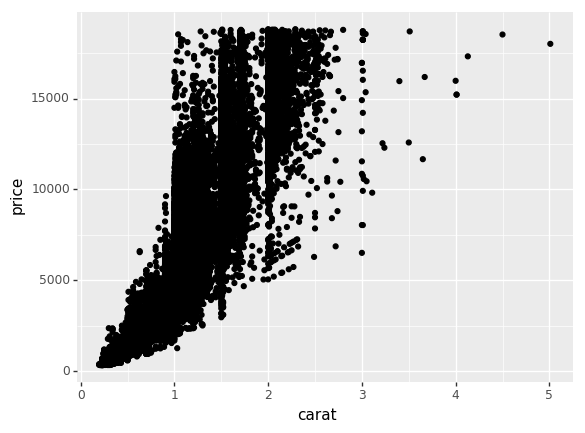

<ggplot: (-9223372036573434287)>

In [35]:
p = ggplot(aes('carat', 'price'), data=diamonds) + geom_point()
p

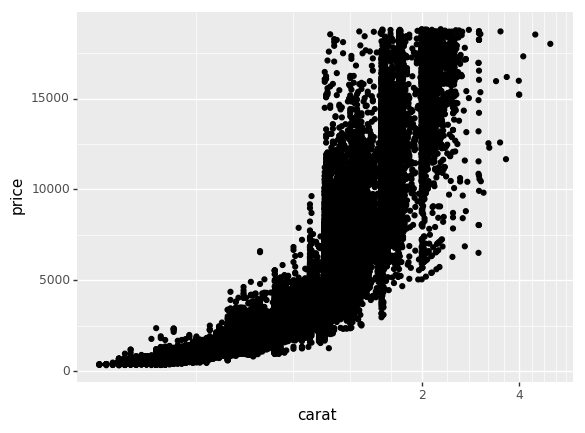

<ggplot: (309250480)>

In [36]:
p + scale_x_log10()

Another useful geom could be something geom_jitter, a shortcut for geom_point(position = "jitter"). It is useful when dealing with a lot of points, especially when many are plotted one top of one another, because it adds a small amount of variation to each point. 

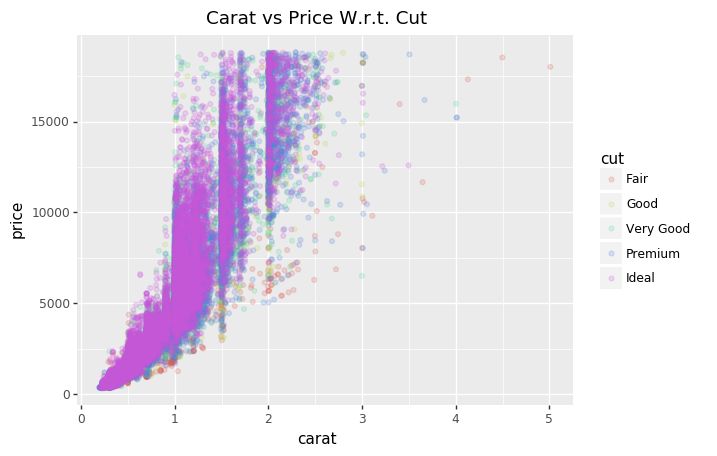

<ggplot: (-9223372036565858528)>

In [37]:
p = ggplot(diamonds, aes('carat', 'price', color = 'cut')) + geom_jitter(alpha=0.2)
p + labs(title = 'Carat vs Price W.r.t. Cut')

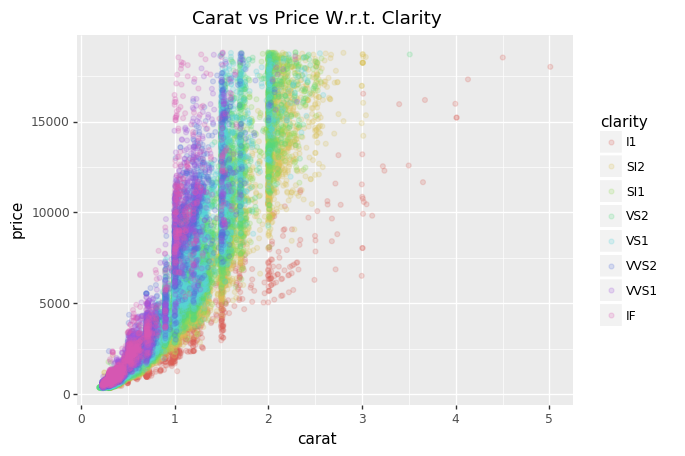

<ggplot: (300056303)>

In [38]:
p = ggplot(diamonds, aes('carat', 'price', color = 'clarity')) + geom_jitter(alpha=0.2)
p = p + labs(title = 'Carat vs Price W.r.t. Clarity')
p

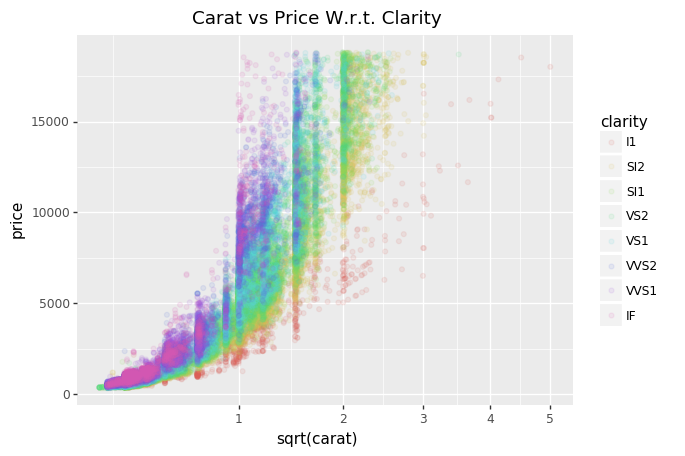

<ggplot: (297297903)>

In [39]:
p = ggplot(diamonds, aes('carat', 'price', color = 'clarity')) + geom_jitter(alpha=0.1)
p = p + labs(x = "sqrt(carat)", title = 'Carat vs Price W.r.t. Clarity')
p + scale_x_sqrt()

Another useful geom is using text. For this one we can consider the mtcars dataset. 

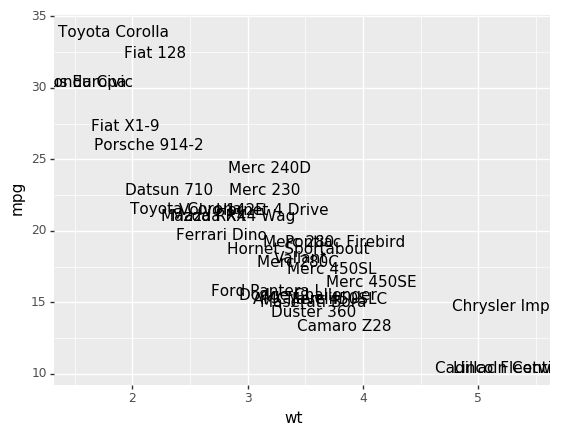

<ggplot: (-9223372036562308650)>

In [40]:
ggplot(mtcars, aes(x='wt', y='mpg', label='name')) + geom_text()

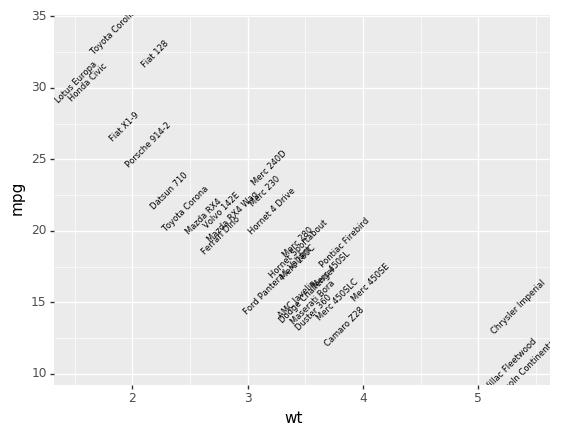

<ggplot: (278810376)>

In [41]:
ggplot(mtcars, aes(x='wt', y='mpg', label='name')) + geom_text(angle=45, size = 6)

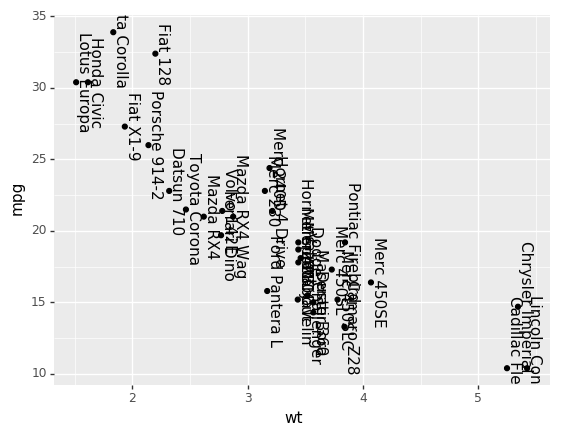

<ggplot: (284715591)>

In [42]:
p = ggplot(mtcars, aes(x='wt', y='mpg', label='name')) 
p = p + geom_text(ha="left", angle=-90) 
p + geom_point()

Boxplots are useful summaries and great for comparing between data sets. A major drawback is that they do not show individual values. 

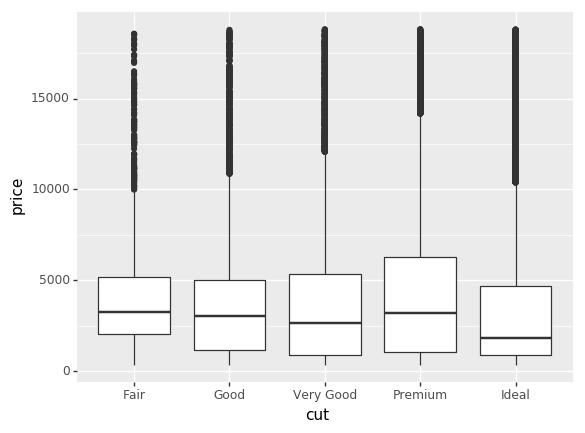

<ggplot: (-9223372036565604036)>

In [43]:
ggplot(aes('cut','price'),diamonds) + geom_boxplot()

Here is the same plot again but with y axis being log(price) rather than just price.

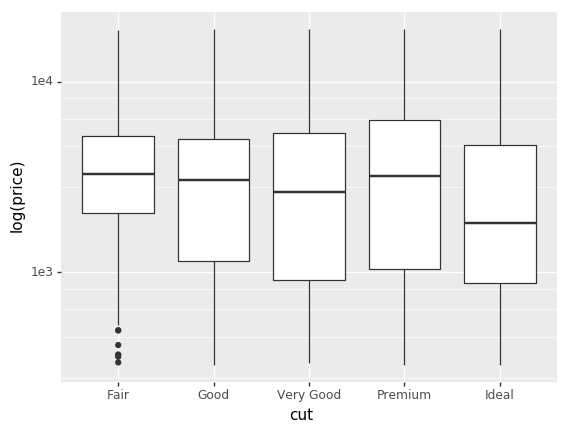

<ggplot: (-9223372036561437801)>

In [65]:
(ggplot(aes('cut','price'),diamonds) + geom_boxplot() + 
 scale_y_log10() + labs(y = "log(price)"))

An alternative to the boxplot is the violin plot, where the shape of the density of points is drawn.

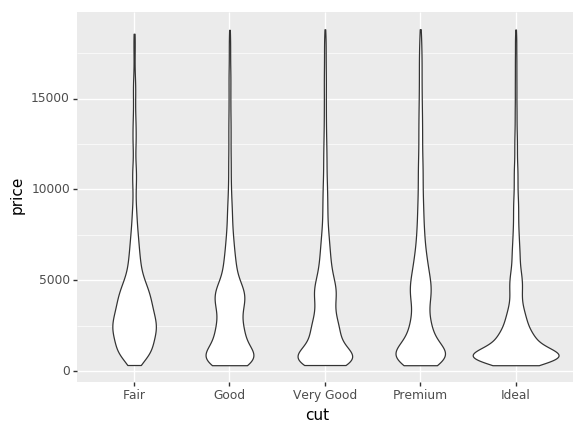

<ggplot: (-9223372036569619610)>

In [45]:
ggplot(aes('cut','price'),diamonds) + geom_violin() 

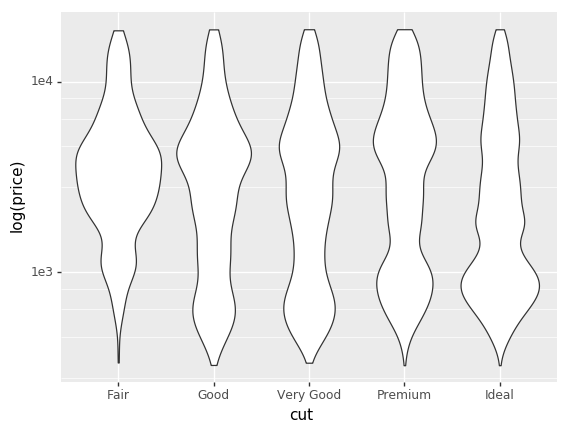

<ggplot: (-9223372036572374654)>

In [66]:
(ggplot(aes('cut','price'),diamonds) + geom_violin() + 
 scale_y_log10() + labs(y="log(price)"))

Here is a plot useful for checking density of the diamond, using the abline geom to add a line with specified slope and intercept to the plot.

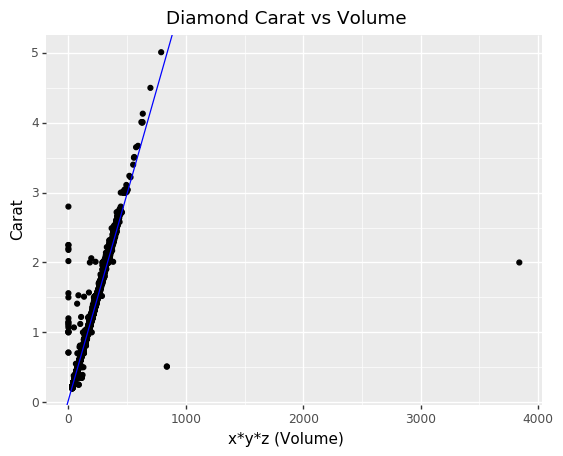

<ggplot: (-9223372036572293267)>

In [47]:
from scipy import stats

# Getting equation of form y = mx + b (m = slope and b = intercept)
m, b, _, _, _ = stats.linregress(diamonds['x']*diamonds['y']*diamonds['z'], diamonds["carat"])

p = ggplot(diamonds, aes(x='x*y*z', y='carat')) + geom_point()
p = p + labs(y = 'Carat', x = "x*y*z (Volume)", title = 'Diamond Carat vs Volume') 
p + geom_abline(intercept = b, slope = m, color = 'blue')

The plotnine equivalent of a heatmap, a two-dimensional histogram, is geom_bin2d: 

For more information on what you can do with this refer to: https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_bin2d.html#plotnine.geoms.geom_bin2d.

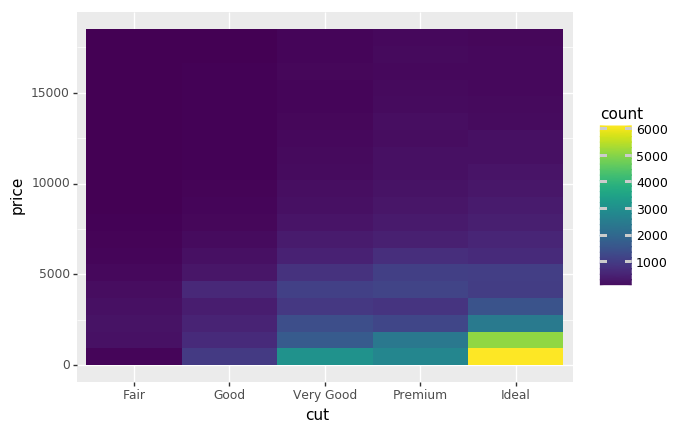

<ggplot: (-9223372036572447635)>

In [67]:
ggplot(diamonds) + aes('cut', 'price') + geom_bin2d(bins=20)

## Facets

We use faceting when we want to split up the data by one or more variables but still plot all the subplots together in one main plot.

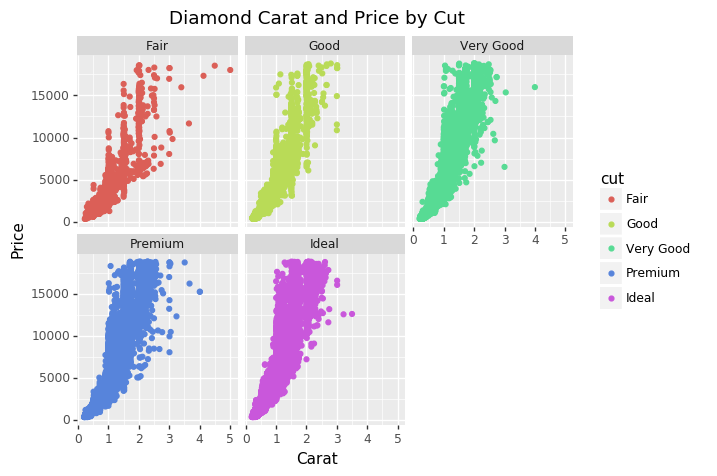

<ggplot: (286358150)>

In [49]:
p = ggplot(diamonds, aes(x="carat", y="price", color="cut")) 
p = p + geom_point() + labs(title="Diamond Carat and Price by Cut", x="Carat", y="Price")  
p + facet_wrap("cut", ncol=3) #ncol specifies number of columns

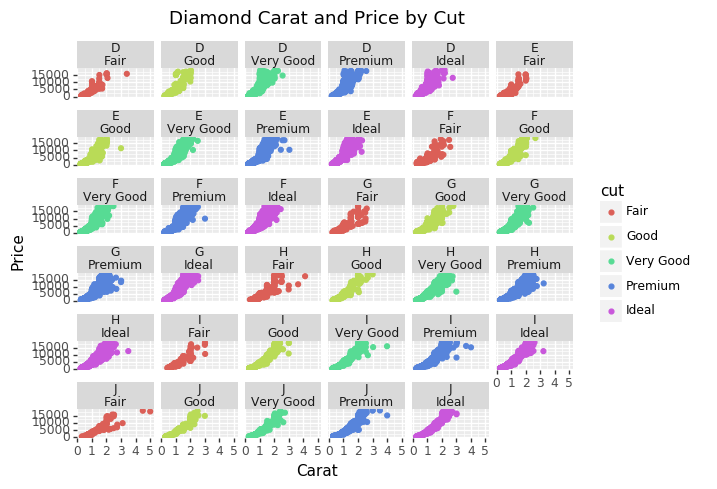

<ggplot: (286358262)>

In [50]:
#Specifying ncol can be useful as seen in the example below
p + facet_wrap(facets = ("color", "cut"))

Sometimes instead of just default dimensions of faceting, facets can be placed next to each other, wrapping with a sepecified number of columns or rows. We can see below how this helps with the overall appearance of the graph. Just like before, the label for each plot is seen at the top of the plot.

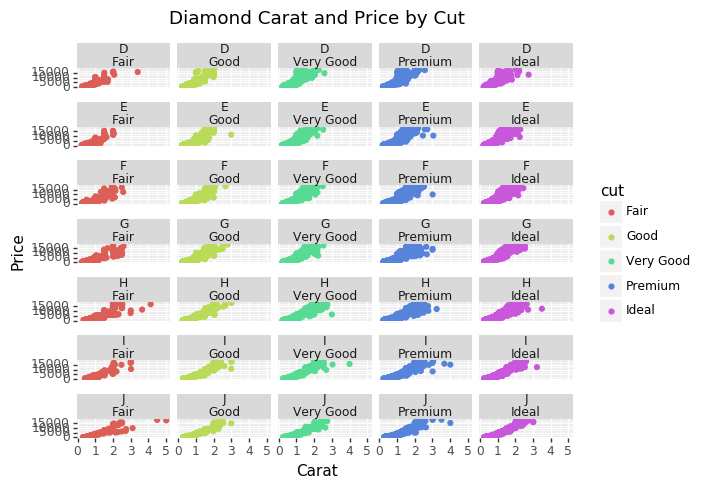

<ggplot: (-9223372036573599004)>

In [51]:
p + facet_wrap(facets = ("color", "cut"), ncol=5)

Here are a few more examples of faceting with the diamonds dataset. 

In this first one, note that we used scales="free" in facet_wrap. This will create separate y-ranges for different facets. This can be confusing if it is unclear that the ranges are different. It can also be more helpful in viewing the distribution though. 

We use panel_spacing to add white space between the facets (so that the y-axis labels don't overlay the facets). 

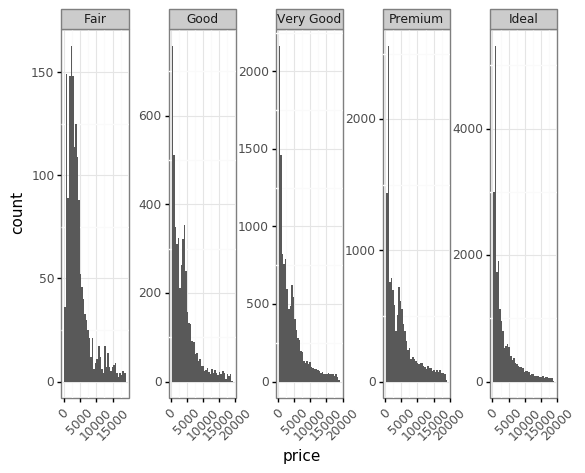

<ggplot: (291878166)>

In [52]:
(ggplot(diamonds, aes(x='price')) + geom_histogram(bins = 40) + 
 facet_wrap("cut", scales="free", ncol=5) + theme_bw() + 
 theme(panel_spacing=0.4, axis_text_x=element_text(angle=45)))

Compare this top graph with the one below it. In this bottom one we can hardly that see the overall trend in all the graphs is pretty similar (higher counts for lower prices and curve going down as price goes up). In the bottom graph though, we can more easily see the difference in count between the different cuts. Using "scales = free" might not always be useful but sometimes it can be and in those cases it is good to know.

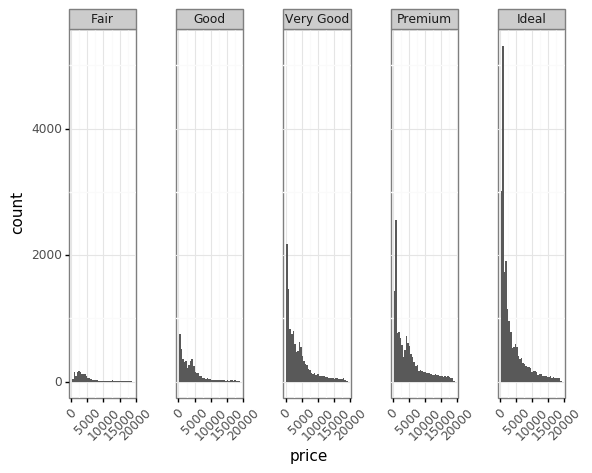

<ggplot: (-9223372036575805573)>

In [53]:
(ggplot(diamonds, aes(x='price')) + geom_histogram(bins = 40) + 
 facet_wrap("cut", ncol=5) + theme_bw() + 
 theme(panel_spacing=0.4, axis_text_x=element_text(angle=45)))

Since we have seen how price varies with cut and color, below is a graph to see how it varies with clarity.

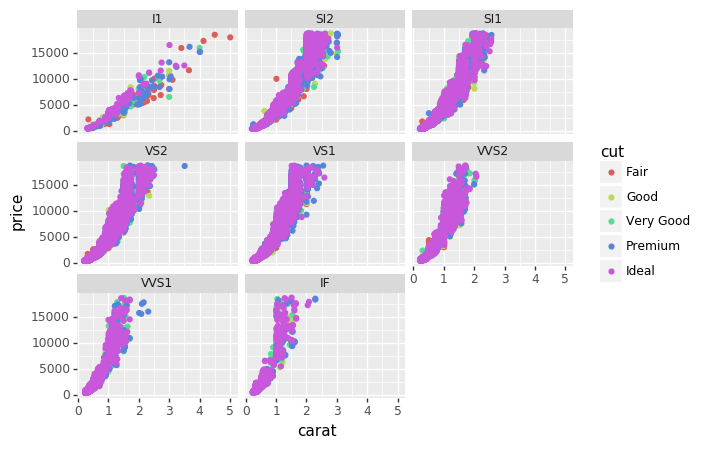

<ggplot: (-9223372036553777173)>

In [68]:
(ggplot(aes(x='carat', y = 'price', color = 'cut'), data = diamonds) + 
 geom_point() + facet_wrap('clarity'))

## Time Series

It's time! ... to learn how to plot time series. For this section we will use the meat dataset (also built-in) since that provides a date column.

In [55]:
meat.head()

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


In [56]:
len(meat)

827

The pandas melt function lets you change one column to be the identifier column and others to be measured/value variables. It is probably best understood by example so below we set date to be the identifier column and see how this changes the dataframe.

In [57]:
import pandas as pd
meat_lng = pd.melt(meat, id_vars=['date'])
meat_lng.head()

,date,variable,value
0,1944-01-01,beef,751.0
1,1944-02-01,beef,713.0
2,1944-03-01,beef,741.0
3,1944-04-01,beef,650.0
4,1944-05-01,beef,681.0


In [58]:
r, c = meat.shape
#length of the dataset after melt is equal to length of 
#original dataset times number of non identifier column features
len(meat_lng) == len(meat) * (c - 1) 

True

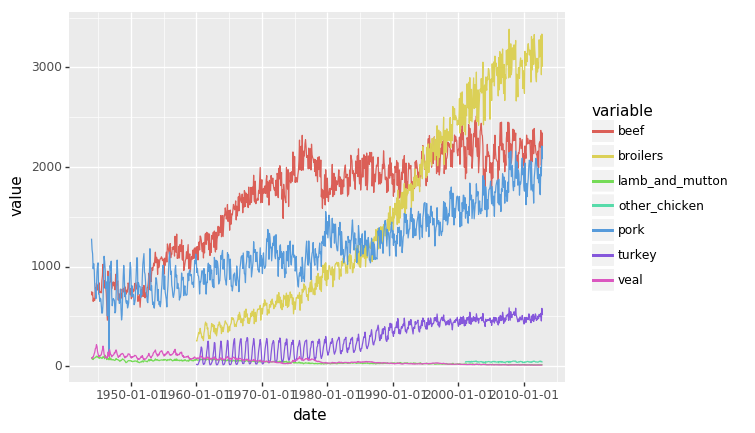

<ggplot: (-9223372036556828384)>

In [59]:
time_p = ggplot(aes(x='date', y='value', colour='variable'), data=meat_lng) + geom_line()
time_p

All dates seem to be of the first of the month. Since day of month is not useful extra information then, we can change the x-axis date labels into a more readable format as follows: 

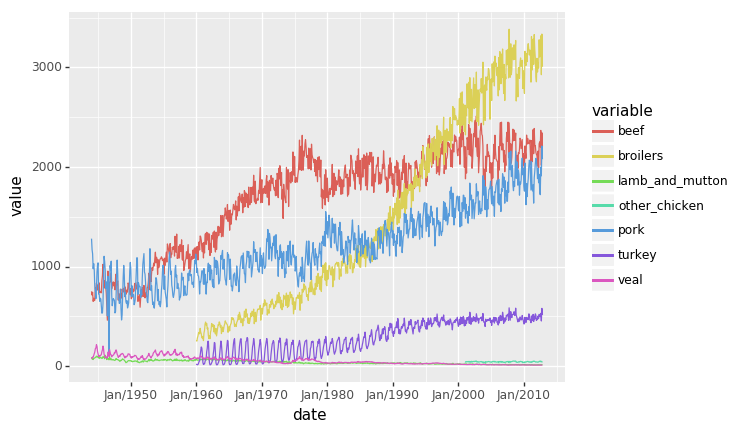

<ggplot: (297947624)>

In [60]:
time_p + scale_x_date(date_labels = "%b/%Y") 

## Smoothing

We can add information to a graph by showing the lines smoothed with a linear model with confidence intervals.

Note: We use factor(gear) below so gear is treated as a discrete rather than continuous variable. You can compare the first two graphs below to see that difference. 

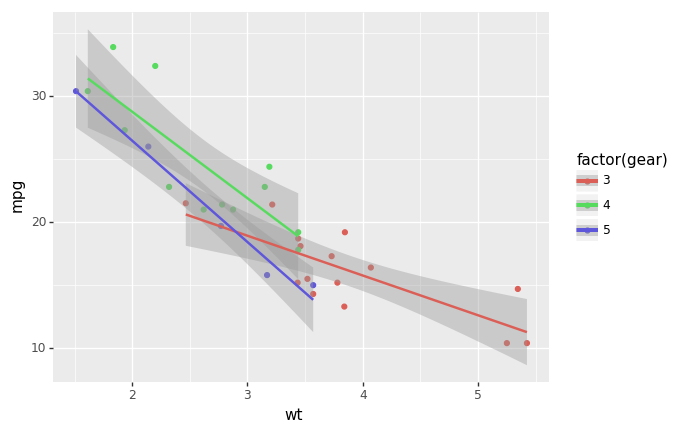

<ggplot: (-9223372036574082132)>

In [61]:
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm'))

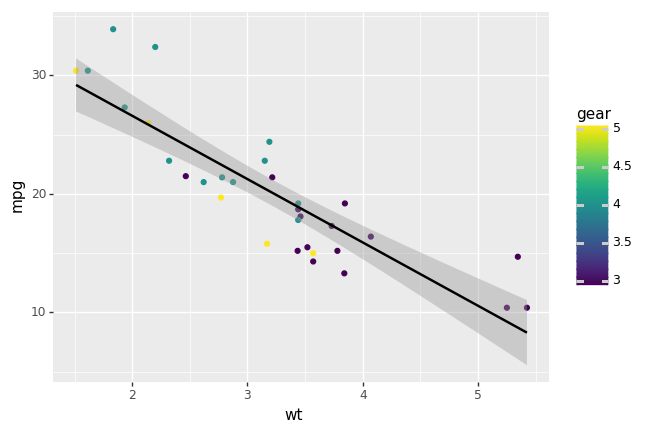

<ggplot: (-9223372036572872283)>

In [62]:
(ggplot(mtcars, aes('wt', 'mpg', color='gear'))
 + geom_point()
 + stat_smooth(method='lm'))

If you want to compare the graphs side-by-side rather than on the same plot:

Also, here are some other things you can do with stat_smooth: http://plotnine.readthedocs.io/en/stable/generated/plotnine.stats.stat_smooth.html

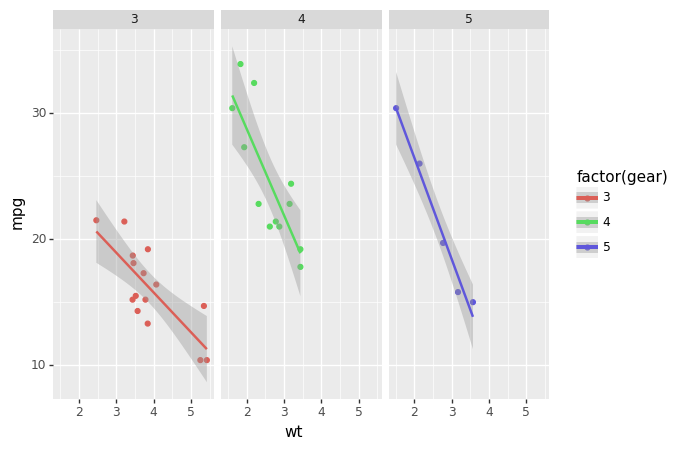

<ggplot: (-9223372036572880731)>

In [63]:
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear'))

## Other Python Implementations of R's ggplot

It is useful to be aware there are other libraries that perform similar functionalites. This list includes ggplot through yhat: http://blog.yhat.com/posts/new-ggplot.html.

Other contenders for graphing (not related to ggplot) in Python include Altair, Seaborn, Bokeh, plot.ly, and Matplotlib.

R's ggplot is definitely a staple in data science and plotnine does the best job of producing similar functionalities in Python. This article agrees and points out some reasons why: http://pltn.ca/plotnine-superior-python-ggplot/.

## References

For more information about anything related to topics discussed above/plotnine refer to: http://plotnine.readthedocs.io/en/stable/api.html